In [2]:
import numpy as np
import pandas as pd
# from skimage import imread
from matplotlib.image import imread
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import pickle
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,callbacks,metrics,backend
from tensorflow.keras.optimizers import RMSprop
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# sys.path.append(os.path.abspath(r'C:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\ml_alzheimer_class\src'))
sys.path.append(os.path.relpath('../src'))
import utils as ut
import math



## Classes

In [101]:
metr_class_dict = {'Model':['baseline','model 2','model 3'],
                   'Model type':['XGBoost','Gradient Boost','Neural Network'],
                   'Accuracy':[0.95,0.96,0.92],'Recall':[0.912,0.914,0.92]}
class_df = pd.DataFrame(metr_class_dict)
class_df

,Model,Model type,Accuracy,Recall
0,baseline,XGBoost,0.95,0.912
1,model 2,Gradient Boost,0.96,0.914
2,model 3,Neural Network,0.92,0.920


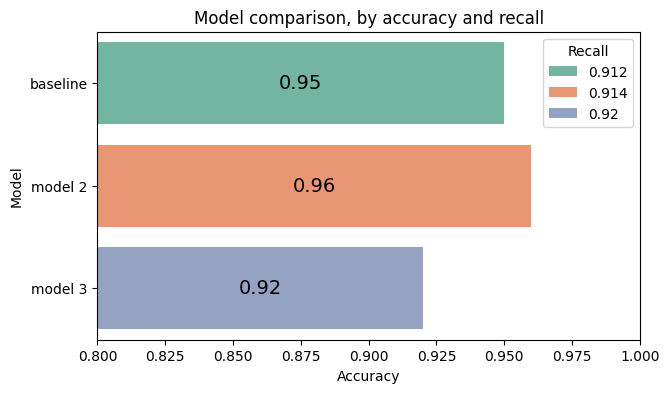

In [147]:
plt.figure(figsize=[7,4])
barplot = sns.barplot(data=class_df,x='Accuracy',y='Model',hue='Recall',palette='Set2')
plt.xlim([0.8,1])
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f',label_type='center',
        padding=0,fontsize=14)
plt.title('Model comparison, by accuracy and recall')
plt.show()

In [140]:
model_2= pickle.load(open("../models/class/model_2.pkl",'rb'))

In [141]:
class_featnames = model_2[1].feature_names_in_
class_feats = model_2[1].feature_importances_.round(3)
print(class_featnames)
print(class_feats)

['MMSE' 'FunctionalAssessment' 'MemoryComplaints' 'BehavioralProblems'
 'ADL']
[0.273 0.283 0.113 0.083 0.248]


Text(0.5, 1.0, 'Feature Importances of selected model')

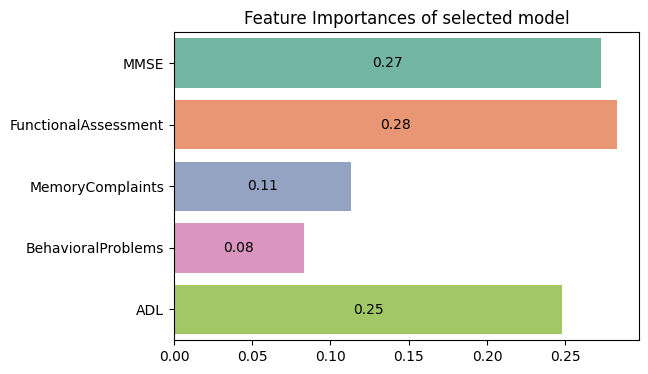

In [145]:
plt.figure(figsize=[6,4])
barplot_2 = sns.barplot(x=class_feats,y=class_featnames,hue=class_featnames,palette='Set2')
for container in barplot_2.containers:
    barplot_2.bar_label(container, fmt='%.2f',label_type='center',
        padding=0,fontsize=10)
plt.title('Feature Importances of selected model')


In [62]:
alz = pd.read_csv('../data/class/raw/alzheimers_disease_data.csv',index_col='PatientID')
alz_2b = alz[['MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems','ADL','Diagnosis']] #,'mix'
x1_train, x1_test, y1_train, y1_test = ut.train_test(alz_2b,test_size=.2)
y1_pred = model_2.predict(x1_test)

In [72]:
accuracy_score(y1_test,y1_pred)

0.9651162790697675

In [64]:
corr = confusion_matrix(y1_test,y1_pred,normalize='true').round(2)
print(corr)

[[0.98 0.02]
 [0.06 0.94]]


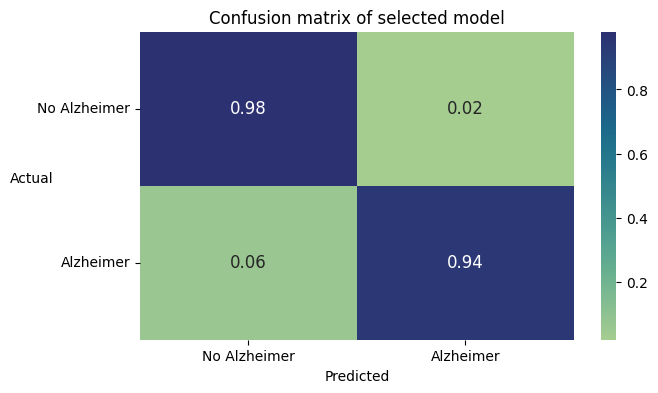

In [66]:
plt.figure(figsize=[7,4])
plt.title('Confusion matrix of selected model')
palette = sns.diverging_palette(145, 300, s=60, as_cmap=True,)
sns.heatmap(corr, annot=True,cmap='crest',cbar=True,annot_kws={"fontsize": 12})
plt.xlabel('Predicted')
plt.xticks(np.arange(2)+0.5, labels=(['No Alzheimer', 'Alzheimer']))
plt.ylabel('Actual',rotation=0)
plt.yticks(np.arange(2)+0.5, labels=(['No Alzheimer', 'Alzheimer']),rotation=0)
plt.show();

## Images

In [16]:
metr_image_dict = {'Model':['baseline','model 2','model 3','model 4','model 5'],
                   'Accuracy Val':[0.81,0.82,0.63,0.94,0.87], 'Accuracy Test':[0.81,0.85,0.62,0.94,0.87],'Recall':[0.83,0.86,0.64,0.94,0.87],
                   'Fit Runtime (minutes)':[5,11,8,17,23], 'Pred Runtime (seconds)':[1,1,1,4,4]}
len(metr_image_dict['Accuracy Val'])

5

In [17]:
image_df = pd.DataFrame(metr_image_dict)
image_df

,Model,Accuracy Val,Accuracy Test,Recall,Fit Runtime (minutes),Pred Runtime (seconds)
0,baseline,0.81,0.81,0.83,5,1
1,model 2,0.82,0.85,0.86,11,1
2,model 3,0.63,0.62,0.64,8,1
3,model 4,0.94,0.94,0.94,17,4
4,model 5,0.87,0.87,0.87,23,4


In [20]:
image_df.sort_values(['Accuracy Test'])

,Model,Accuracy Val,Accuracy Test,Recall,Fit Runtime (minutes),Pred Runtime (seconds)
2,model 3,0.63,0.62,0.64,8,1
0,baseline,0.81,0.81,0.83,5,1
1,model 2,0.82,0.85,0.86,11,1
4,model 5,0.87,0.87,0.87,23,4
3,model 4,0.94,0.94,0.94,17,4


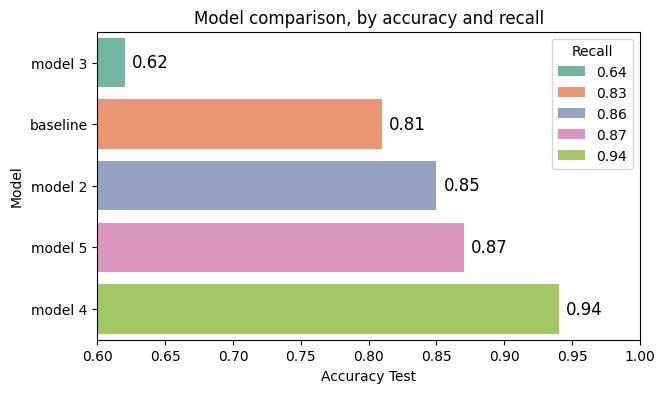

In [150]:
plt.figure(figsize=[7,4])
barplot = sns.barplot(data=image_df.sort_values(['Accuracy Test']),x='Accuracy Test',y='Model',hue='Recall',palette='Set2')
plt.xlim([0.6,1])
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f',label_type='edge',
        padding=5,fontsize=12)
plt.title('Model comparison, by accuracy and recall')
plt.show()

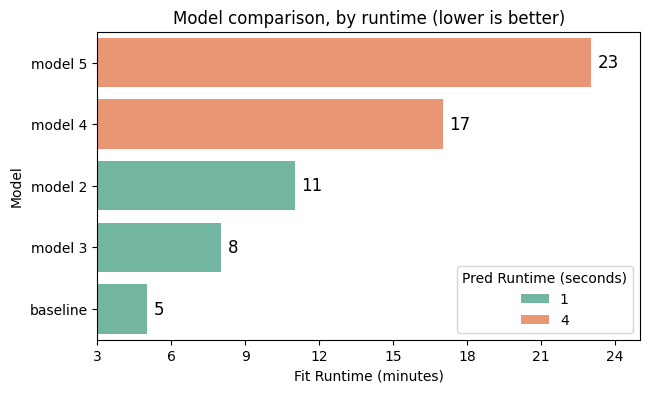

In [154]:
plt.figure(figsize=[7,4])
barplot = sns.barplot(data=image_df.sort_values(['Fit Runtime (minutes)'],ascending=False),x='Fit Runtime (minutes)',y='Model',hue='Pred Runtime (seconds)',palette='Set2')
plt.xticks(np.arange(3,25,3))
plt.xlim([3,25])
for container in barplot.containers:
    barplot.bar_label(container, fmt='{:.0f}',label_type='edge',
        padding=5,fontsize=12)
plt.title('Model comparison, by runtime (lower is better)')
plt.show()

In [35]:
img_model = models.load_model("../models/image/model_5.keras")
x1_train,x1_test,x1_val,y1_train,y1_test,y1_val,scal = ut.img_images_load('../data/images/processed_train/x1_64.pkl','../data/images/processed_train/y1_64.pkl',
                                                                     '../data/images/processed_val/x2_64.pkl','../data/images/processed_val/y2_64.pkl',
                                                                     val_set = True,reshuffle=True,img_size=64)



x1_train shape (34326, 64, 64, 1)
x1_test shape (6058, 64, 64, 1)
y1_train shape (34326,)
y1_test shape (6058,)
y1_train distribution: 
 [[    0 10880]
 [    1  9520]
 [    2  8377]
 [    3  5549]]
y1_test distribution: 
 [[   0 1920]
 [   1 1680]
 [   2 1479]
 [   3  979]]
x1_val shape (6866, 64, 64, 1)
y1_val shape (6866,)
y1_val distribution: 
 [[   0 2176]
 [   1 1904]
 [   2 1676]
 [   3 1110]]


In [36]:
y1_pred = img_model.predict(x1_test).argmax(axis=1)

190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


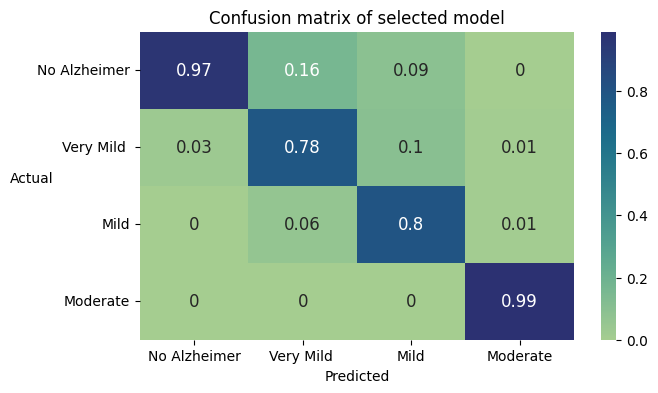

In [58]:
corr_img = confusion_matrix(y1_test, y1_pred,normalize='pred').round(2) #,normalize='pred'
plt.figure(figsize=[7,4])
plt.title('Confusion matrix of selected model')
palette = sns.diverging_palette(145, 300, s=60, as_cmap=True,)
sns.heatmap(corr_img, annot=True,cmap='crest',cbar=True,annot_kws={"fontsize": 12})
plt.xlabel('Predicted')
plt.xticks(np.arange(4)+0.5, labels=(['No Alzheimer', 'Very Mild ', 'Mild' , 'Moderate']))
plt.ylabel('Actual',rotation=0)
plt.yticks(np.arange(4)+0.5, labels=(['No Alzheimer', 'Very Mild ', 'Mild' , 'Moderate']),rotation=0)
# plt.yticks('No Alzheimer / Very Mild / Mild / Moderate (Actual)')
plt.show();

## Business Presentation charts

In [85]:
waittime = pd.read_csv('../data/auxiliar/mean_time_specialist.csv',sep=';')
waittime.head()

,Año,Periodo,Consultas externas,Quirúrgica
0,2006,Semestre 2,54.0,70.0
1,2007,Semestre 1,53.0,70.0
2,2007,Semestre 2,58.0,74.0
3,2008,Semestre 1,59.0,68.0
4,2008,Semestre 2,59.0,71.0


In [69]:
waittime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Año                 54 non-null     object 
 1   Periodo             37 non-null     object 
 2   Consultas externas  36 non-null     float64
 3   Quirúrgica          37 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [86]:
waittime = waittime.dropna(axis=0)
waittime['Año'] = waittime['Año'].astype(int)
wait_group = waittime.groupby('Año')['Consultas externas'].mean()

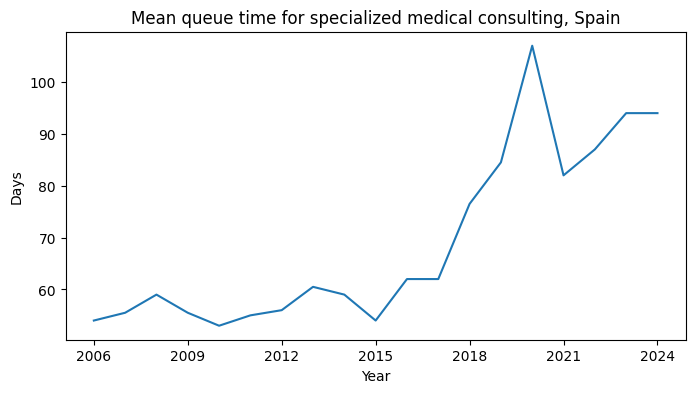

In [100]:
plt.figure(figsize=(8,4))
sns.lineplot(wait_group)
plt.xticks(ticks=range(2006, 2025, 3))
plt.ylabel('Days')
plt.xlabel('Year')
plt.title('Mean queue time for specialized medical consulting, Spain')
plt.show();

In [102]:
### Winning class model
win_class_dict = {'Metrics':['accuracy','recall'],
                   'Values':[96,91.4]}
win_class_df = pd.DataFrame(win_class_dict)
win_class_df

,Metrics,Values
0,accuracy,96.0
1,recall,91.4


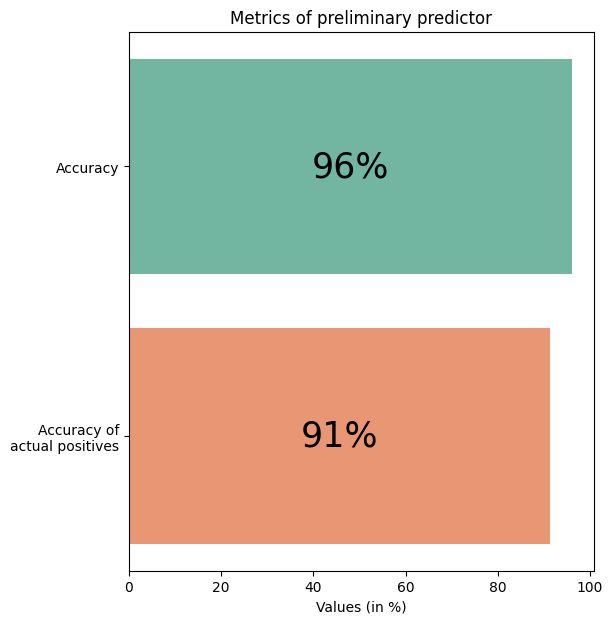

In [130]:
plt.figure(figsize=[6,7])
barplot_3 = sns.barplot(data=win_class_df,x='Values',y='Metrics',hue='Metrics',palette='Set2',legend=False)
for container in barplot_3.containers:
    barplot_3.bar_label(container, fmt='{:.0f}%',label_type='center',
        padding=-0,fontsize=25)
plt.ylabel('')
plt.yticks(np.arange(2), labels=(['Accuracy', 'Accuracy of\nactual positives']),rotation=0)
plt.xlabel('Values (in %)')
plt.title('Metrics of preliminary predictor')
plt.show();

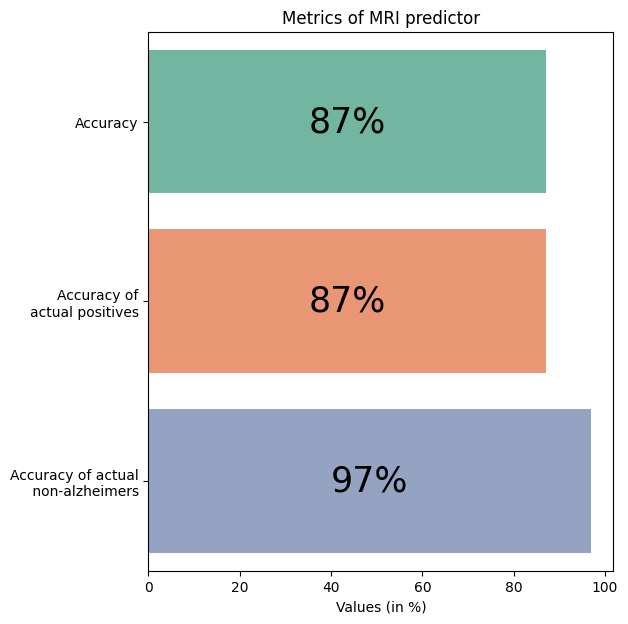

In [3]:
### Winning image model
win_image_dict = {'Metrics':['accuracy','recall','accuracy non alz'],
                   'Values':[87,87,97]}
win_image_df = pd.DataFrame(win_image_dict)
plt.figure(figsize=[6,7])
barplot_3 = sns.barplot(data=win_image_df,x='Values',y='Metrics',hue='Metrics',palette='Set2',legend=False)
for container in barplot_3.containers:
    barplot_3.bar_label(container, fmt='{:.0f}%',label_type='center',
        padding=-0,fontsize=25)
plt.ylabel('')
plt.yticks(np.arange(3), labels=(['Accuracy', 'Accuracy of\nactual positives','Accuracy of actual\n non-alzheimers']),rotation=0)
plt.xlabel('Values (in %)')
plt.title('Metrics of MRI predictor')
plt.show();